# PLAYER ATTRIBUTES AND DEMOGRAPHICS

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the path to access the data
path = r"C:\Users\Mihir\8_CAPSTONE PROJECT\S1_Data_Preprocessing\1_Preprocessing_Data_&_EDA_LEVEL_0\\"
path

'C:\\Users\\Mihir\\8_CAPSTONE PROJECT\\S1_Data_Preprocessing\\1_Preprocessing_Data_&_EDA_LEVEL_0\\\\'

In [4]:
# reading required csv files
appearances = pd.read_csv(path + "appearances_df_no_win.csv")
players = pd.read_csv(path + "players_df_winsorised.csv")
games = pd.read_csv(path + "games_df_winsorised.csv")
game_events = pd.read_csv(path + "game_events_df_no_win.csv")
test = pd.read_csv(path + "test data.csv")

# How do player attributes (height, foot, position) correlate with performance metrics (goals, assists)?

In [6]:
df = pd.merge(players, appearances, on='player_id')

position_perf_corr = df[['height_in_cm', 'foot', 'position', 'goals', 'assists']].groupby('position')[['goals', 'assists']].mean().sort_values(by = 'goals', ascending = False)
display(position_perf_corr)

foot_perform = df[['height_in_cm', 'foot', 'position', 'goals', 'assists']].groupby('foot')[['goals', 'assists']].mean().sort_values(by = 'goals', ascending = False)
display(foot_perform)

,goals,assists
position,,
Attack,0.197061,0.114088
Midfield,0.068522,0.072805
Defender,0.042453,0.056604
Goalkeeper,0.000000,0.004796


,goals,assists
foot,,
right,0.102202,0.074673
both,0.101604,0.144385
left,0.044211,0.037895


In [7]:
# Create Bins for Height Wise Goal And Assist Distribution
bins = [150, 160, 170, 180, 190, 200]
df['height_group'] = pd.cut(df['height_in_cm'], bins = bins)

# Create the bar chart for goals and assists for each height group
height_wise_goal_assist_distributions = df.groupby('height_group')[['goals', 'assists']].mean().dropna().reset_index()
display(height_wise_goal_assist_distributions)

,height_group,goals,assists
0,"(160, 170]",0.125000,0.100000
1,"(170, 180]",0.102957,0.088719
2,"(180, 190]",0.110188,0.086379
3,"(190, 200]",0.048208,0.025958


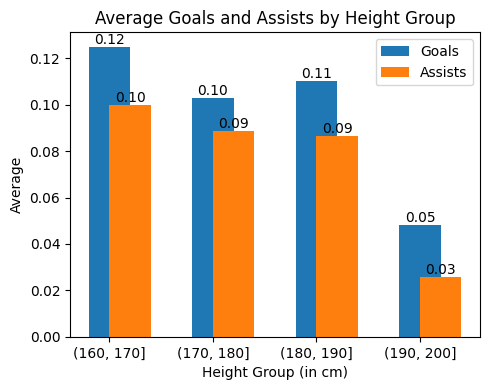

In [8]:
# Plotting the average goals per height group
plt.figure(figsize=(5, 4))
plt.bar(height_wise_goal_assist_distributions['height_group'].astype(str), 
        height_wise_goal_assist_distributions['goals'], label='Goals', width=0.4, align='center')

# Plotting the average assists per height group next to goals
plt.bar(height_wise_goal_assist_distributions['height_group'].astype(str), 
        height_wise_goal_assist_distributions['assists'], label='Assists', width=0.4, align='edge')

# Adding labels on top of the bars
plt.bar_label(plt.gca().containers[0], fmt='%.2f')  # For goals
plt.bar_label(plt.gca().containers[1], fmt='%.2f')  # For assists

# Set title and labels
plt.title('Average Goals and Assists by Height Group')
plt.xlabel('Height Group (in cm)')
plt.ylabel('Average')
plt.xticks(rotation=0)  # Rotate x labels if needed

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# What is the age distribution of players, and how does age affect performance?

In [10]:
# Merge age with performance data
df = pd.merge(players, appearances, on='player_id')

# Calculate age based on date_of_birth and current date
curr_date = 2024
age = [int(curr_date - int(x[:4])) for x in df['date_of_birth']]
df['age'] = age

bins = [20, 25, 30, 35, 40, 45, 50, 55, 60]
df['age_group'] = pd.cut(df['age'], bins = bins)
age_wise_goal_assist_distributions = df.groupby('age_group')[['goals', 'assists']].mean().dropna().reset_index()
display(age_wise_goal_assist_distributions)


,age_group,goals,assists
0,"(20, 25]",0.104418,0.100402
1,"(25, 30]",0.107285,0.082119
2,"(30, 35]",0.124474,0.073171
3,"(35, 40]",0.061404,0.067251
4,"(40, 45]",0.059006,0.059006
5,"(50, 55]",0.000000,0.000000


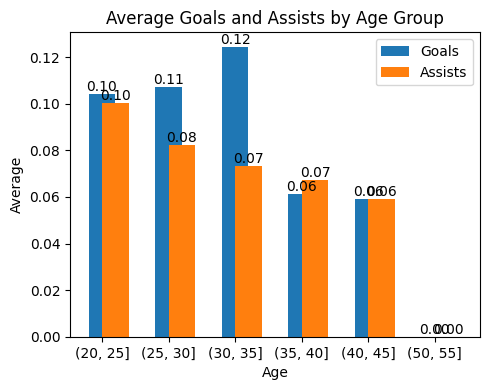

In [11]:
# Plotting the average goals per age group
plt.figure(figsize=(5, 4))
plt.bar(age_wise_goal_assist_distributions['age_group'].astype(str), 
        age_wise_goal_assist_distributions['goals'], label='Goals', width=0.4, align='center')

# Plotting the average assists per age group next to goals
plt.bar(age_wise_goal_assist_distributions['age_group'].astype(str), 
        age_wise_goal_assist_distributions['assists'], label='Assists', width=0.4, align='edge')

# Adding labels on top of the bars
plt.bar_label(plt.gca().containers[0], fmt='%.2f')  # For goals
plt.bar_label(plt.gca().containers[1], fmt='%.2f')  # For assists

# Set title and labels
plt.title('Average Goals and Assists by Age Group')
plt.xlabel('Age')
plt.ylabel('Average')
plt.xticks(rotation=0) 

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Are players from certain countries more successful in specific competitions?

In [13]:
# Merge appearances with games to include competition information
df_appearances_games = pd.merge(appearances[['player_id', 'game_id', 'goals', 'assists']], 
                                games[['game_id', 'competition_id']], on='game_id').drop_duplicates()

# Merge the result with players to include country information
df_country_comp = pd.merge(players[['player_id', 'country_of_birth']], df_appearances_games,
                           on='player_id').drop('game_id', axis = 1).drop_duplicates()

# Group by country and competition to sum goals and assists
country_comp_success = df_country_comp.groupby(['country_of_birth', 'competition_id'])[['goals', 'assists']].sum().reset_index()
country_comp_success['total_contributions'] = country_comp_success['goals'] + country_comp_success['assists']
country_comp_success.head()

,country_of_birth,competition_id,goals,assists,total_contributions
0,Colombia,NL1,2,2,4
1,England,CL,0,1,1
2,England,DFB,1,0,1
3,England,FAC,0,0,0
4,England,L1,1,2,3


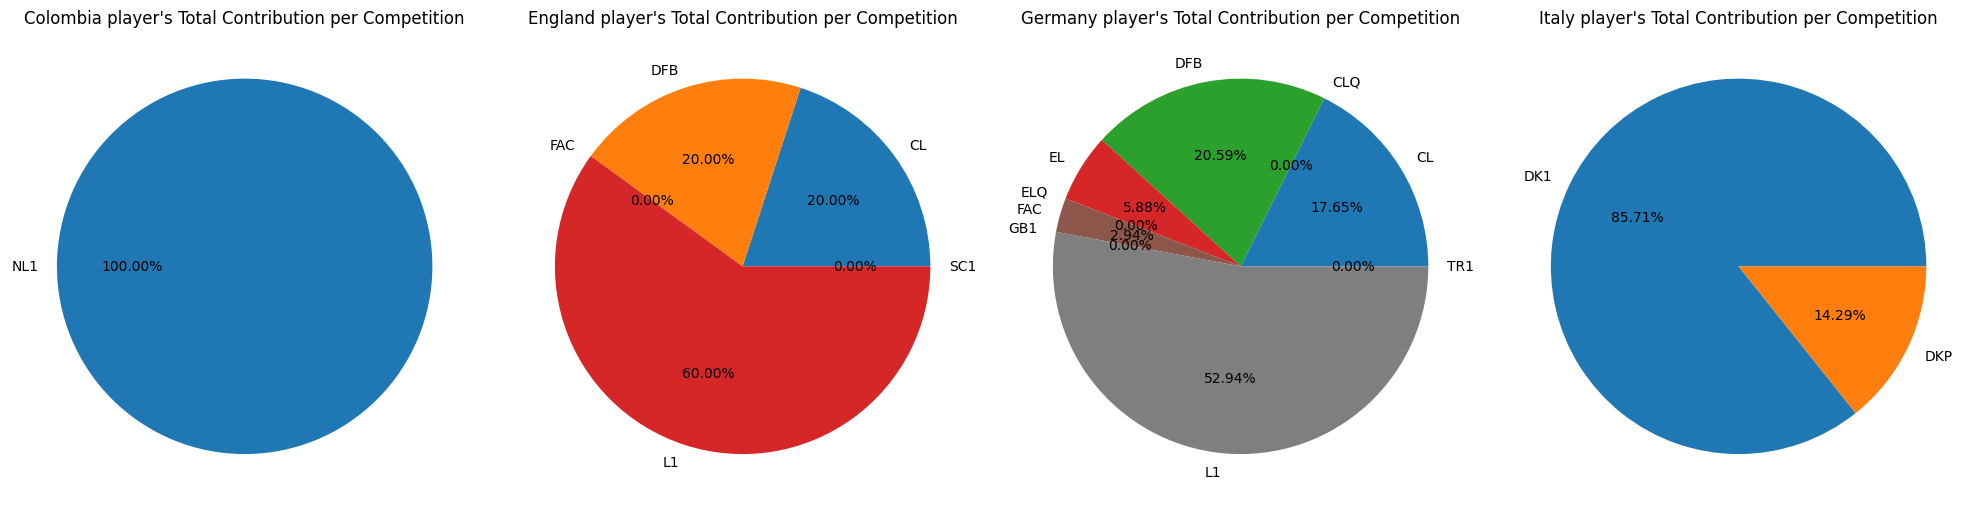

In [14]:
# Create subplots 
fig, ax = plt.subplots(1, 4, figsize=(20, 7))  
ax = ax.flatten()

# Initialize a valid index for subplots
valid_index = 0

# Loop through each unique country and create pie charts
for country in country_comp_success['country_of_birth'].unique():
    if country in ['Ethiopia', 'Ireland']:  # Filtering countries with 0 contribution players
        continue

    # Filter data for the current country
    filter_country = country_comp_success[country_comp_success['country_of_birth'] == country]
    
    # Group by competition and sum total contributions
    gby = filter_country.groupby('competition_id')['total_contributions'].sum()
    
    # Get values and labels for the pie chart
    x = gby.values.tolist()
    labels = gby.index.tolist()
    
    # Check for valid contributions
    if x and len(x) > 0:  # Ensure there are contributions to plot
        ax[valid_index].pie(x, labels=labels, autopct="%.2f%%")
        ax[valid_index].set_title(f"{country} player's Total Contribution per Competition")
        valid_index += 1  # Increment only if a pie chart was created
    
    # Stop if we exceed the number of subplots available
    if valid_index >= len(ax):
        break

# Ensure the layout doesn't overlap and show the plot
plt.tight_layout()
plt.show()

# Which sub-positions contribute the most to team success (goals, assists, defense)?

In [16]:
# Merge sub_position with performance data
df = pd.merge(players[['player_id', 'sub_position', 'position']], appearances[['player_id', 'goals', 'assists']], on='player_id')

# Group by sub_position and calculate total goals and assists
subpos_contribution = df.groupby('sub_position')[['goals', 'assists']].sum().reset_index()
pos_contribution = df.groupby('position')[['goals', 'assists']].sum().reset_index()
display(subpos_contribution)
display(pos_contribution)

,sub_position,goals,assists
0,Attacking Midfield,15,15
1,Central Midfield,29,31
2,Centre-Back,29,27
3,Centre-Forward,141,49
4,Defensive Midfield,14,21
5,Goalkeeper,0,2
6,Left Midfield,0,0
7,Left Winger,23,30
8,Right Midfield,6,1
9,Right Winger,52,46


,position,goals,assists
0,Attack,228,132
1,Defender,45,60
2,Goalkeeper,0,2
3,Midfield,64,68


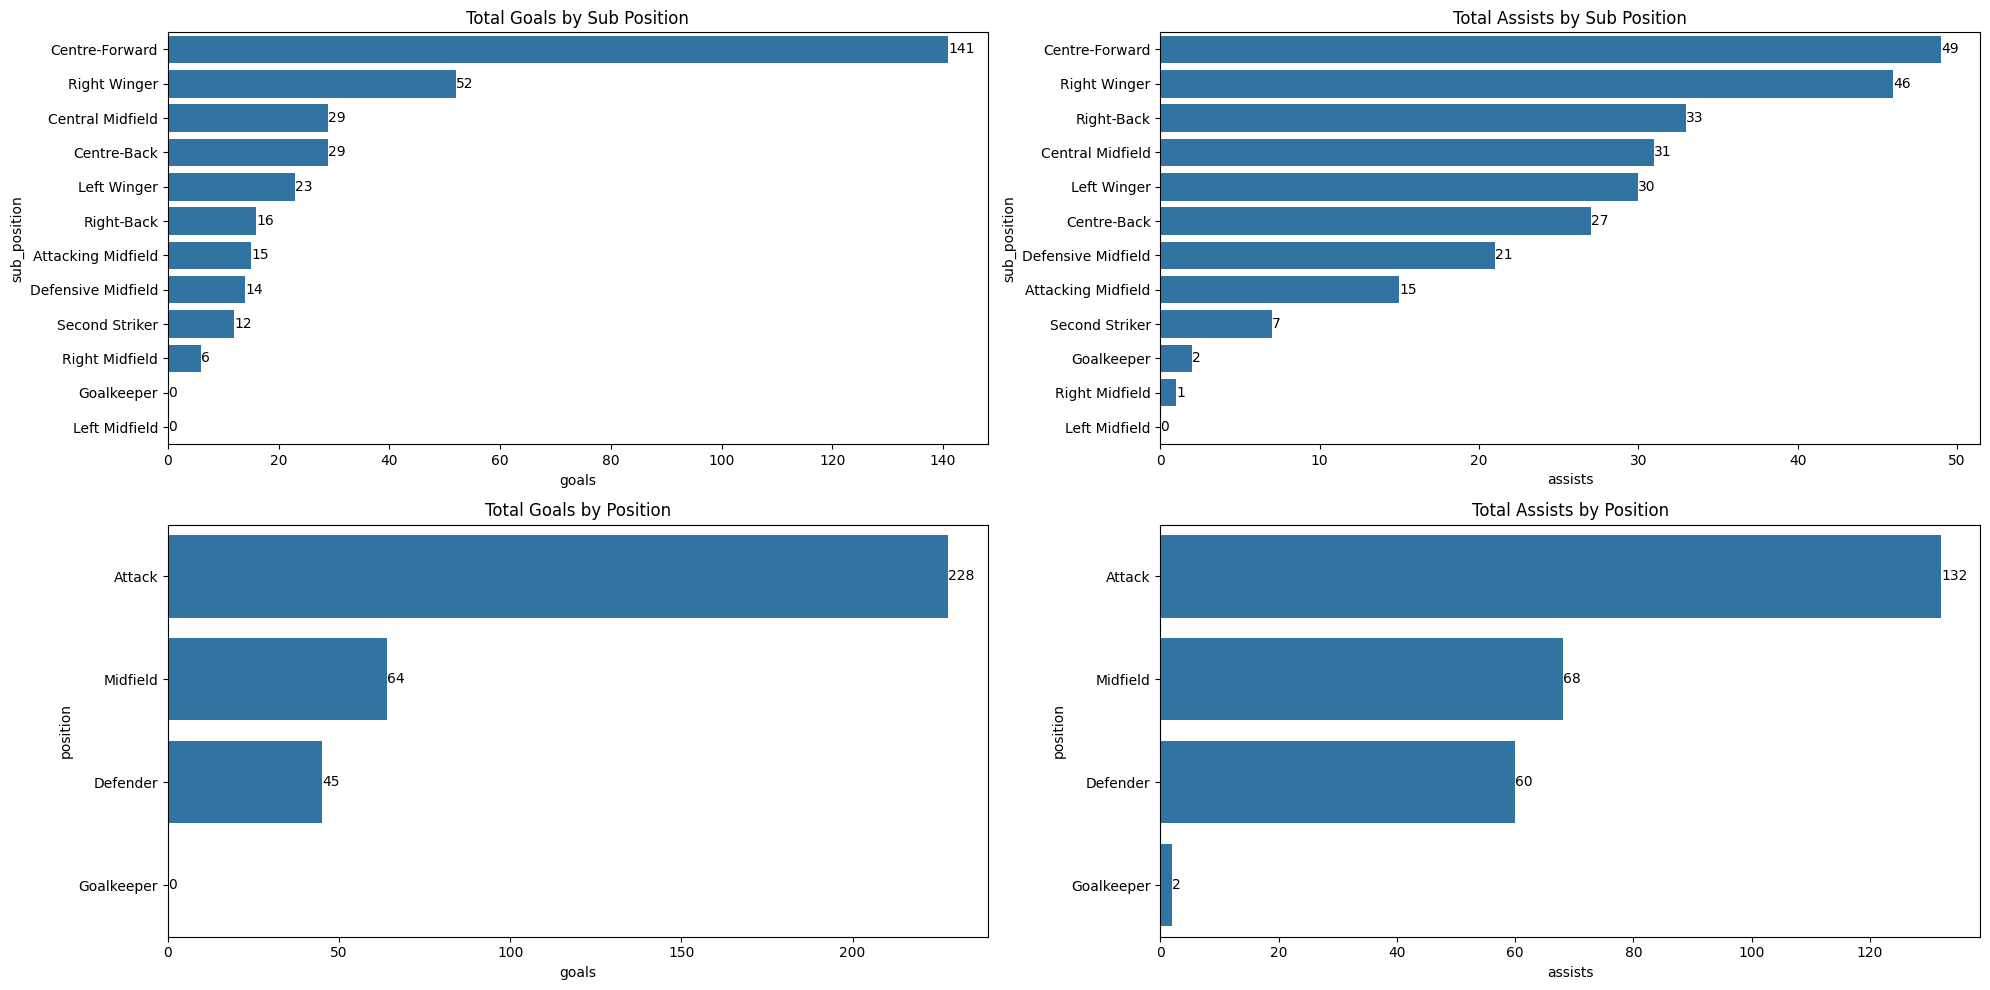

In [28]:
# Visualize the contributions of positions and sub positions:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax = ax.flatten()

# Barplot for sub_position goals contribution
sns.barplot(y='sub_position', x='goals', data=subpos_contribution.sort_values(by = 'goals', ascending = False), ax=ax[0])
ax[0].set_title('Total Goals by Sub Position')
ax[0].set_xticklabels(ax[0].get_xticklabels())
for bar in ax[0].containers:
    ax[0].bar_label(bar, fmt = '%.0f')

# Barplot for sub_position assists contribution
sns.barplot(y='sub_position', x='assists', data=subpos_contribution.sort_values(by = 'assists', ascending = False), ax=ax[1])
ax[1].set_title('Total Assists by Sub Position')
ax[1].set_xticklabels(ax[1].get_xticklabels())
for bar in ax[1].containers:
    ax[1].bar_label(bar, fmt = '%.0f')

# Barplot for position goals contribution
sns.barplot(y='position', x='goals', data=pos_contribution.sort_values(by = 'goals', ascending = False), ax=ax[2])
ax[2].set_title('Total Goals by Position')
ax[2].set_xticklabels(ax[2].get_xticklabels())
for bar in ax[2].containers:
    ax[2].bar_label(bar, fmt = '%.0f')

# Barplot for position assists contribution
sns.barplot(y='position', x='assists', data=pos_contribution.sort_values(by = 'assists', ascending = False), ax=ax[3])
ax[3].set_title('Total Assists by Position')
ax[3].set_xticklabels(ax[3].get_xticklabels())
for bar in ax[3].containers:
    ax[3].bar_label(bar, fmt = '%.0f')

# Adjust layout
plt.tight_layout()
plt.show()

# USING K-MEANS CLUSTERING
## Can we group players by their market value, physical attributes, and demographics to explore potential investment opportunities?

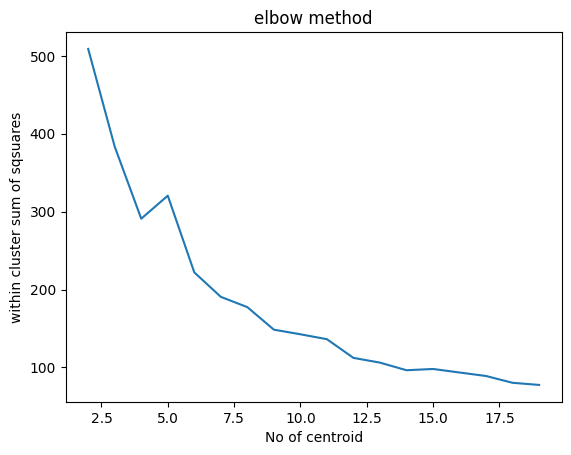

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Creating Age Column
curr_date = 2024
age = [int(curr_date - int(x[:4])) for x in players['date_of_birth']]
players['age'] = age

# Creating Country Encoded column
le = LabelEncoder()
players['country_encoded'] = le.fit_transform(players['country_of_birth'])

# Standardizing the numerical values
stand_scaler = StandardScaler()
players[['market_value_scaled', 'height_scaled', 'age']] = stand_scaler.fit_transform(players[['market_value_in_eur', 'height_in_cm', 'age']])

# Creating new dataframe for training
training = players[['market_value_scaled', 'age', 'height_scaled','country_encoded']]

# Cluster players based on market value, age, and country
X = training

# Finding the Optimal Value for K using elbow Method
from sklearn.cluster import KMeans
wcss = []

rnge = range(2,20)
for i in rnge:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# display(wcss)

plt.plot(rnge, wcss)
plt.title("elbow method")
plt.xlabel("No of centroid")
plt.ylabel("within cluster sum of sqsuares")
plt.show()


In [93]:
# Training Based on 12 Centroids
kmeans = KMeans(n_clusters=12)
training['cluster'] = kmeans.fit_predict(X)
training.head()

,market_value_scaled,age,height_scaled,country_encoded,cluster
0,0.327585,0.320893,1.596542,3,1
1,-0.541211,-0.145117,-1.813493,10,0
2,-0.396412,0.010220,-1.387239,10,0
3,1.875127,-0.766464,0.033609,10,6
4,1.875127,-0.455791,-0.676815,10,10


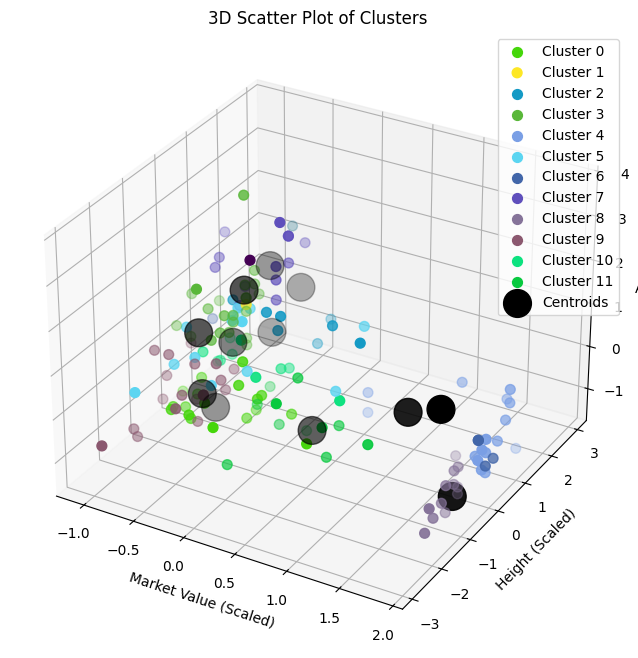

In [85]:
# 3d plot for 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract cluster centroids
centroids = kmeans.cluster_centers_

optimal_k = 12
colors = np.random.rand(optimal_k, 3)

# Plot each cluster
for i in range(optimal_k):
    ax.scatter(
        X[training['cluster'] == i]['market_value_scaled'],
        X[training['cluster'] == i]['height_scaled'],
        X[training['cluster'] == i]['age'],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=400, c='black', marker='o', label='Centroids')

# Set axis labels
ax.set_xlabel('Market Value (Scaled)')
ax.set_ylabel('Height (Scaled)')
ax.set_zlabel('Age')

# Set title and show plot
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()


In [89]:
from sklearn.metrics import silhouette_score # , silhouette_samples
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 5, 10, 12, 13]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4455906846094508
For n_clusters = 5 The average silhouette_score is : 0.5315248672842844
For n_clusters = 10 The average silhouette_score is : 0.5196899449362681
For n_clusters = 12 The average silhouette_score is : 0.5926427749052058
For n_clusters = 13 The average silhouette_score is : 0.5451109837413665


In [123]:
# Finding Grouped players 
optimal_k = 12
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
players['cluster'] = kmeans.fit_predict(X)

for cluster in players['cluster'].unique():
    print(cluster)
    print(players[players['cluster'] == cluster]['name'].values)

2
['John Anthony Brooks' 'Timothy Chandler' 'Fabian Johnson' "Shane O'Neill"
 'Jonathan Klinsmann' 'Gedion Zelalem' 'Lennard Maloney' 'Alfredo Morales'
 'Jermaine Jones' 'Danny Williams' 'Terrence Boyd' 'David Yelldell'
 'Jerome Kiesewetter']
1
['Emerson Hyndman' 'Lynden Gooch' 'Russell Canouse' 'DeAndre Yedlin'
 'Travis Brent' 'Julian Green' 'Benji Michel' 'Seyi Adekoya' 'Kenny Saief'
 'Griffin Yow' 'Cameron Harper' 'Ulysses Llanez' 'Juan Torres'
 'Richard Ledezma' 'Caleb Stanko' 'Jose Gallegos' 'Joel Sonora'
 'Indiana Vassilev' 'Jonathan Amon' 'Anthony Fontana' 'George Fochive'
 'Kyle Duncan' 'Joseph Efford' 'Joe Gyau']
0
['Timothy Weah' 'Matt Turner' 'Auston Trusty' 'Gabriel Slonina'
 'Zack Steffen' 'Ricardo Pepi' 'Bryan Reynolds' 'Mark McKenzie'
 'Joe Scally' 'Weston McKennie' 'Josh Sargent' 'Jordan' 'Keaton Parks'
 'Chris Richards']
9
['Djordje Mihailovic' 'Paxten Aaronson' 'Christian Pulisic'
 'Brenden Aaronson' 'Reggie Cannon' 'Gianluca Busio' 'Tyler Adams'
 'Taylor Booth' 'Kevi

# SAVING FILES TO EXCEL FOR POWERPOINT PRESENTATIONS

In [33]:
# Define the file path
workbook_path = r'C:\Users\Mihir\8_CAPSTONE PROJECT\excel_files_for_ppt\9_Player_Attributes.xlsx'

try:
    # Proceed with the ExcelWriter if the file exists
    
    with pd.ExcelWriter(workbook_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        # Save the DataFrame to a new sheet
        position_perf_corr.to_excel(writer, sheet_name="position_perf_corr", index=True)

        foot_perform.to_excel(writer, sheet_name="foot_perform", index=True)
        
        height_wise_goal_assist_distributions.to_excel(writer, sheet_name="height_wise_goal_assist_dist", index=True)
        
        age_wise_goal_assist_distributions.to_excel(writer, sheet_name="age_wise_goal_assist_dis", index=True)
        
        country_comp_success.to_excel(writer, sheet_name="country_comp_success", index=True)
        
        subpos_contribution.to_excel(writer, sheet_name="subpos_contribution", index=True)
        
        pos_contribution.to_excel(writer, sheet_name="pos_contribution", index=True)
    print("DataFrames successfully written to Excel.")

except Exception as e:
    print(f"An error occurred while writing to Excel: {e}")

DataFrames successfully written to Excel.
